<a href="https://colab.research.google.com/github/Haggin59/Deep-Learning-with-PyTorch-Book-walkthrough/blob/main/1_Deep_Learning_with_Pytorch_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pretrained Networks
## Chapter 2

In this notebook we are going to cover chapter_2 of the Deep Learning with Pytorch book. We are going to load computer vision models which are trained on the ImageNet dataset and performed well on the ImageNet challenge.

The predefined models can be found in `torchvision.models`

In [1]:
from torchvision import models

The uppercase names are python classes that implement the model corresponding their name.  
The lowercase names are functions that return models instantiated with those classes.

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

# AlexNet

The AlexNet won the 2012 ILSVRC challenge by a large margin to its competetors and it was since then that deep learning was extensively used to solve computer vision problems.

  
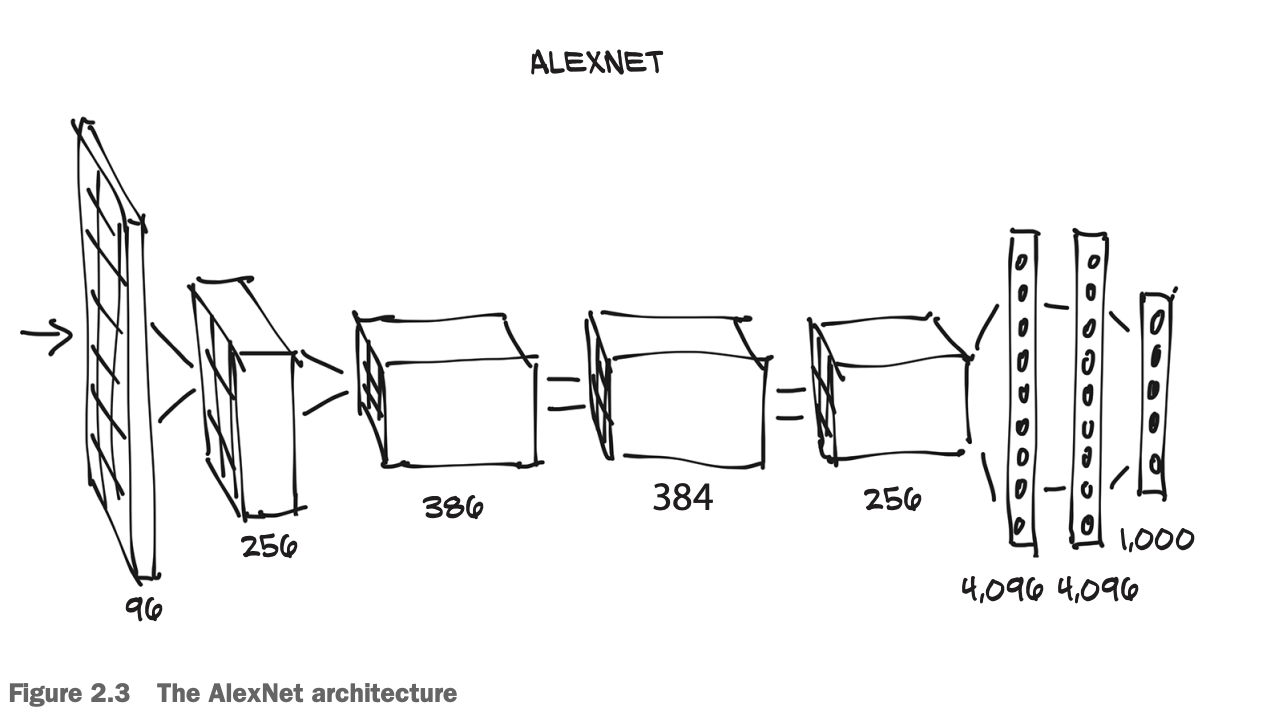



AlexNet architecture was composed of 5 layers of filters each generating a new image reduced in size and annotated.    
  
The image generated by the last layer is flattened into a 4096 element vector, on which classification is performed and 1000 probabilities corresponding to 1000 classes are generated as output.

In [3]:
#instance of AlexNet model
alexnet = models.AlexNet()

ResNet101 is a 101 layer Convolutional Neural Network (CNN)  
`resnet = models.resnet101(pretrained=True)` creates an instance of Resnet 101.  
 `pretrained=True` will download the weights of the network trained on the ImageNet dataset 

In [4]:
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 313MB/s]


In [5]:
resnet
#architecture of ResNet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#Preprocessing

Before providing an input image to the network, preprocessing has to be done to match the parameter (size,shape) of the input image to that of the images the model was trained on

In [6]:
#transforms are used to do image preprocessing  
from torchvision import transforms 
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225])
])


* `transforms.Resize(256)` Scale the image to 256 x 256
* `transforms.CenterCrop(224)` Crop the image to 224 x 224 around the center
* `transforms.ToTensor()` Convert the image to tensor
* `traansforms.Normalize()` Normalize its RGB components so that they have
defined means and standard deviations

In [7]:
from PIL import Image

In [8]:
img = Image.open('/content/dog.jpeg')

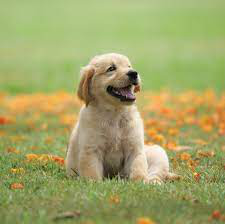

In [9]:
img.show()

In [11]:
img_t = preprocess(img) #Preprocessing

In [13]:
img_t.shape

torch.Size([3, 224, 224])

In [15]:
import torch
batch_t = torch.unsqueeze(img_t,0)
batch_t.shape

torch.Size([1, 3, 224, 224])

Running a trained model is called **inference**.  
Inorder to perfrom inference we need to put the network in `eval` mode.

In [ ]:
#Run
resnet.eval()

In [17]:
out = resnet(batch_t)

In [18]:
out.shape

torch.Size([1, 1000])

In [19]:
#Loading the file containing the 1000 classes on which the model was trained on

with open('/content/imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [22]:
len(labels)

1000

In [26]:
print(labels[0:5])

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark']


In [56]:
_, index = torch.max(out, 1)
index.shape

torch.Size([1])

In [57]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 89.92533111572266)

Example 2: cat

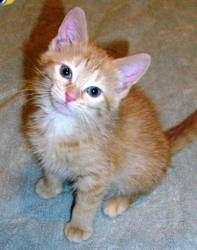

In [35]:
cat_img = Image.open('/content/cat.jpg')
cat_img

In [36]:
cat_t = preprocess(cat_img)
cat_t.shape

torch.Size([3, 224, 224])

In [37]:
batch_cat_t = torch.unsqueeze(cat_t,0)
batch_cat_t.shape

torch.Size([1, 3, 224, 224])

In [38]:
out2 = resnet(batch_cat_t)

In [39]:
out2.argmax()

tensor(283)

In [40]:
labels[283],out2[0,283]

('Persian cat', tensor(8.9327, grad_fn=<SelectBackward0>))

Example 3: Firetruck

In [47]:
import urllib.request
urllib.request.urlretrieve('https://i.cbc.ca/1.6288610.1639684976!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/fire-truck-city-of-iqaluit.jpg'
                            ,'ftruck.jpg')

('ftruck.jpg', <http.client.HTTPMessage at 0x7ff264d74220>)

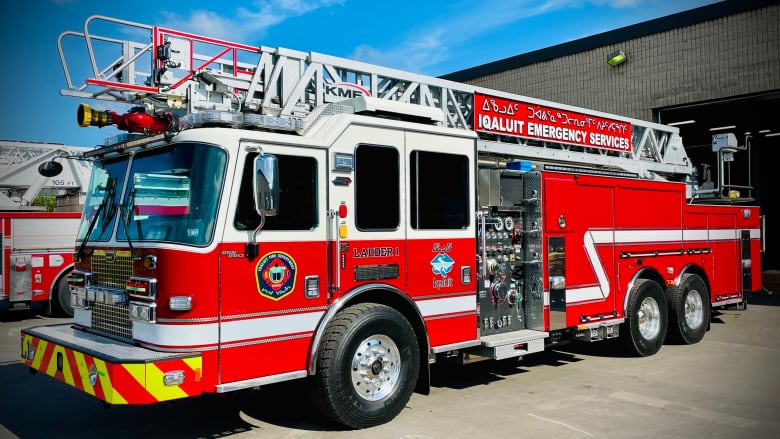

In [48]:
ftruck = Image.open('ftruck.jpg')
ftruck

In [49]:
ftruck_t = preprocess(ftruck)

In [50]:
batch_ftruck = torch.unsqueeze(ftruck_t,0)

In [51]:
out3 = resnet(batch_ftruck)

In [69]:
_,index3 = torch.max(out3,1)

In [72]:
percent3 = torch.nn.functional.softmax(out3, dim=1)[0] * 100
labels[index3[0]], percent3[index3[0]]

('fire engine, fire truck', tensor(99.9266, grad_fn=<SelectBackward0>))

### Top 5 predictions

In [73]:
_, indices = torch.sort(out3, descending=True)

In [79]:
[(labels[idx], percent3[idx]) for idx in indices[0][:5]]

[('fire engine, fire truck', tensor(99.9266, grad_fn=<SelectBackward0>)),
 ('ambulance', tensor(0.0626, grad_fn=<SelectBackward0>)),
 ('police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria',
  tensor(0.0018, grad_fn=<SelectBackward0>)),
 ('fireboat', tensor(0.0011, grad_fn=<SelectBackward0>)),
 ('stretcher', tensor(0.0011, grad_fn=<SelectBackward0>))]